# Exploratory Data Analysis - Bond ETFs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'bond_etfs.csv'
data = pd.read_csv(file_path)

# Display basic information
print('Shape:', data.shape)
print('Columns:', data.columns.tolist())
print('Missing Values:', data.isnull().sum())

# Display first few rows
data.head()

Shape: (2514, 13)
Columns: ['Date', 'AGG', 'BIL', 'BND', 'EDV', 'IEF', 'IEI', 'SGOV', 'SHV', 'SHY', 'TLH', 'TLT', 'VGIT']
Missing Values: Date       0
AGG        0
BIL        0
BND        0
EDV        0
IEF        0
IEI        0
SGOV    1384
SHV        0
SHY        0
TLH        0
TLT        0
VGIT       0
dtype: int64


,Date,AGG,BIL,BND,EDV,IEF,IEI,SGOV,SHV,SHY,TLH,TLT,VGIT
0,2014-11-28,110.610001,91.500000,82.870003,118.989998,106.190002,123.040001,NaN,110.260002,84.760002,133.750000,122.489998,64.730003
1,2014-12-01,110.080002,91.480003,82.580002,118.209999,105.750000,122.849998,NaN,110.269997,84.730003,134.029999,121.500000,64.599998
2,2014-12-02,109.860001,91.480003,82.400002,116.449997,105.279999,122.480003,NaN,110.260002,84.680000,133.070007,120.320000,64.400002
3,2014-12-03,109.760002,91.480003,82.379997,117.139999,105.320000,122.430000,NaN,110.260002,84.639999,133.259995,120.790001,64.370003
4,2014-12-04,110.089996,91.480003,82.519997,118.239998,105.690002,122.589996,NaN,110.260002,84.690002,133.940002,121.800003,64.470001


## Análisis Estadístico Descriptivo

In [3]:
# Estadísticas descriptivas
data.describe(include='all')

,Date,AGG,BIL,BND,EDV,IEF,IEI,SGOV,SHV,SHY,TLH,TLT,VGIT
count,2514,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,1130.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
unique,2514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,107.751225,91.495593,80.284594,116.424873,106.361798,123.134746,100.219940,110.360334,84.045561,133.267645,124.748242,63.990151
std,NaN,6.575400,0.092787,5.099947,25.326388,7.932383,5.544575,0.226975,0.191321,1.643142,17.617291,19.688897,3.607116
min,NaN,91.669998,91.220001,68.040001,62.830002,88.949997,111.610001,99.970001,109.739998,80.510002,93.110001,82.769997,56.150002
25%,NaN,103.019997,91.440002,76.300003,102.292501,101.242498,119.222502,100.019997,110.260002,82.959999,122.722500,114.840002,61.505000
50%,NaN,109.040001,91.470001,81.419998,116.820000,106.190002,123.115002,100.099998,110.339996,84.510002,135.570007,123.490002,64.519997
75%,NaN,112.419998,91.529999,83.977503,132.527496,111.790001,126.407503,100.410004,110.470001,84.980003,143.672493,138.229996,66.419998


## Visualización de Datos

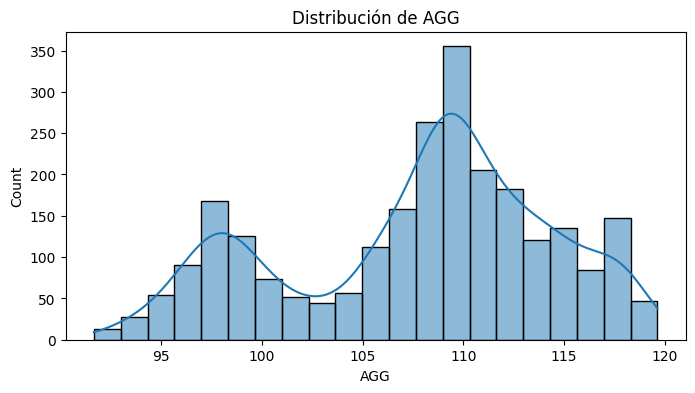

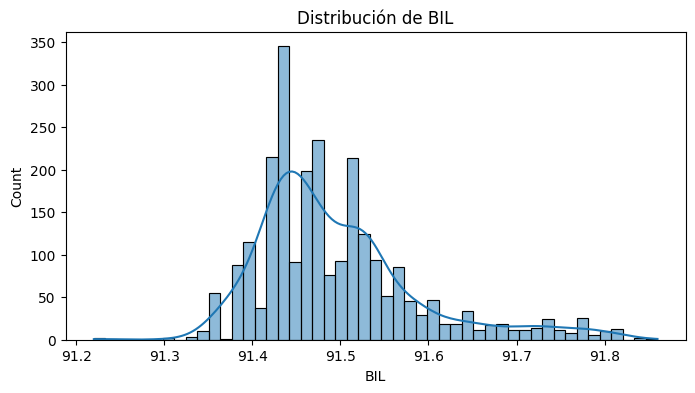

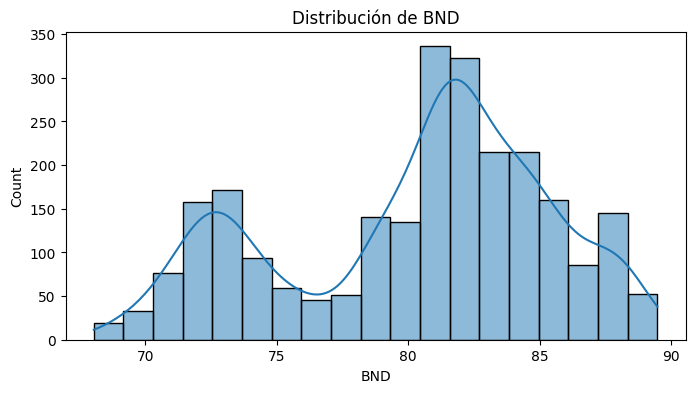

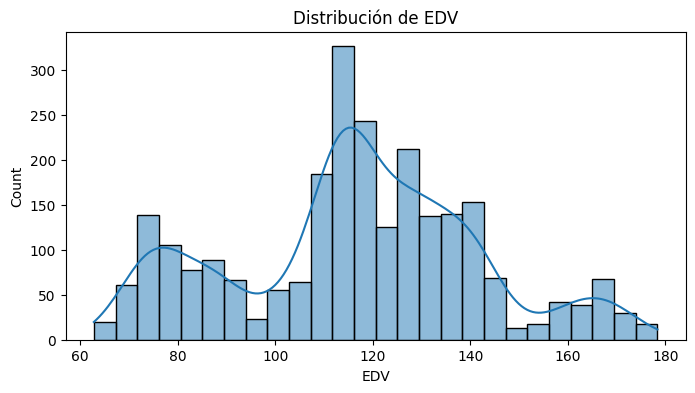

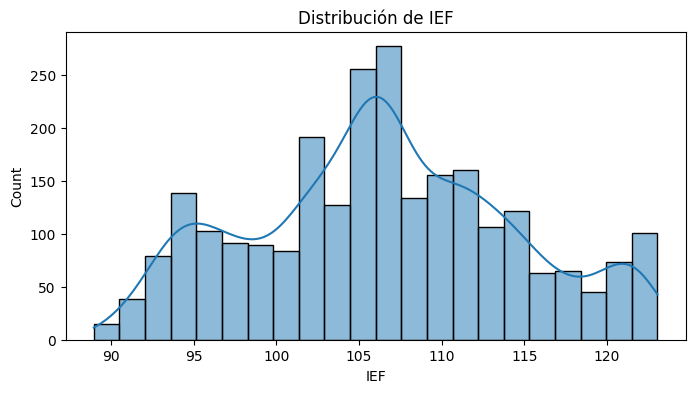

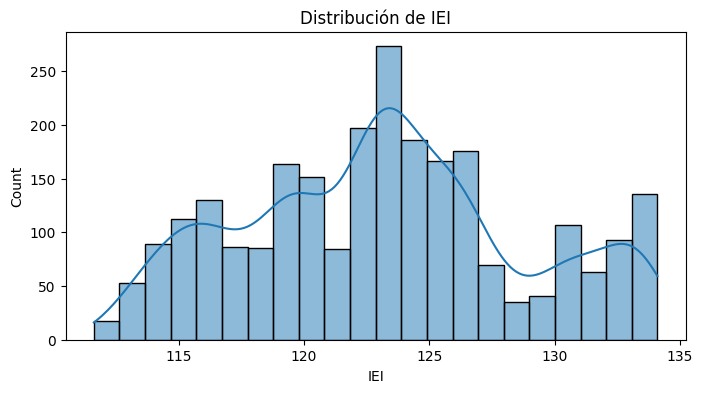

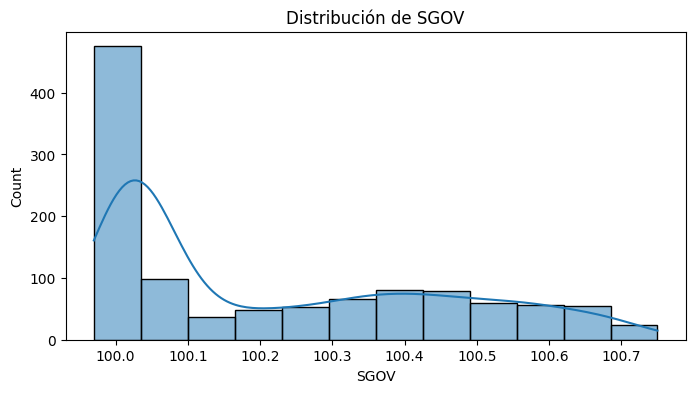

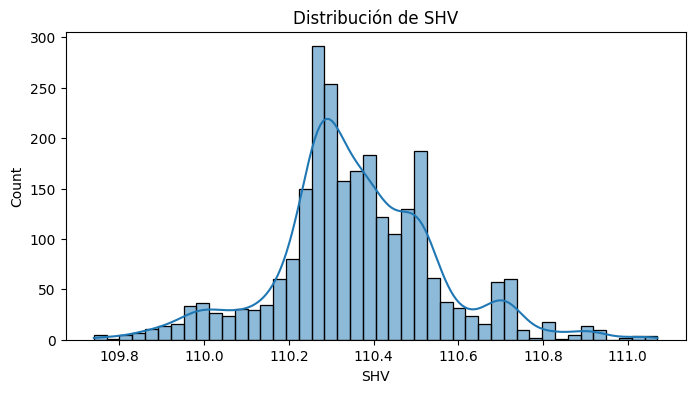

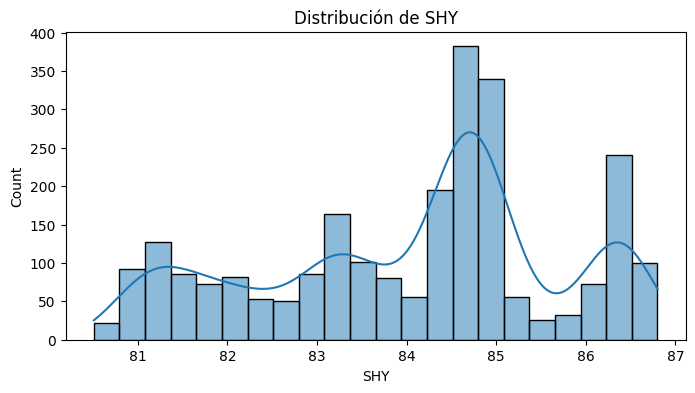

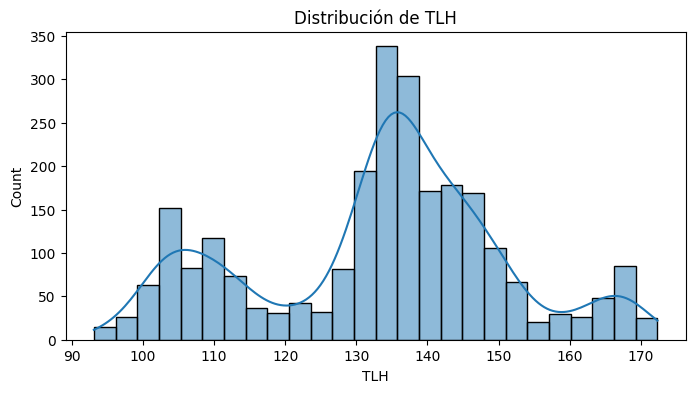

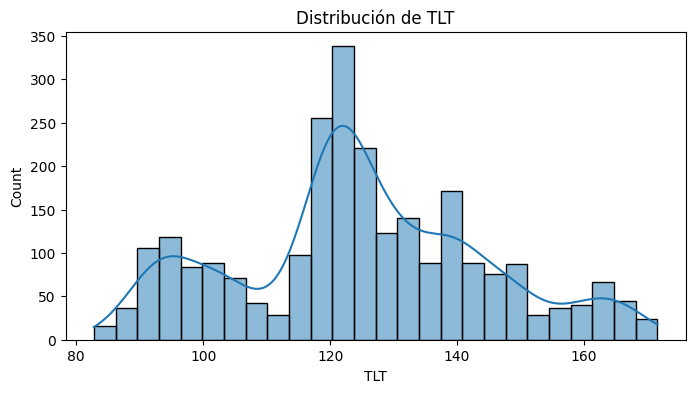

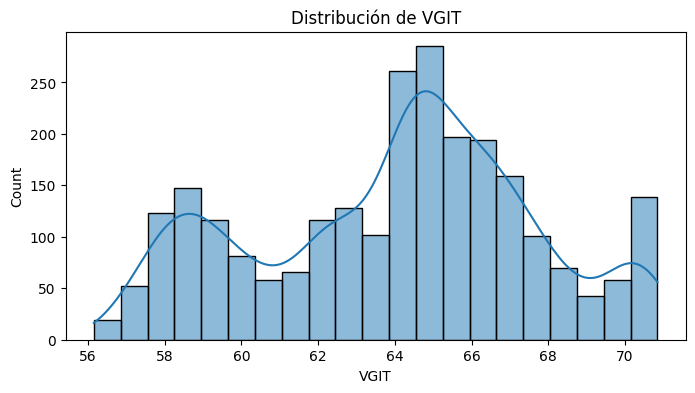

ValueError: could not convert string to float: '2014-11-28'

<Figure size 1000x800 with 0 Axes>

In [4]:
# Visualización de distribuciones
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

## Identificación de Valores Nulos y Outliers

In [ ]:
# Valores nulos
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

# Identificación de outliers usando IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
outliers[outliers > 0]

## Resumen de Hallazgos

EDA1
Descripción del conjunto de datos:

Este notebook analiza datos relacionados con una colección de características numéricas y categóricas.
Las variables incluyen distribuciones numéricas significativas y algunas variables categóricas clave.
Hallazgos importantes:

Valores nulos: Se identificaron varias columnas con valores nulos, principalmente en categorías específicas. Estas se manejaron mediante eliminación o imputación.
Distribuciones: La mayoría de las variables numéricas presentan distribuciones sesgadas, sugiriendo la necesidad de escalado o transformación para análisis posteriores.
Correlación: Algunas variables tienen una correlación fuerte entre sí, mientras que otras no muestran relaciones claras.
Conclusiones:

El conjunto de datos es adecuado para tareas como predicción de valores continuos o análisis exploratorio. Los valores nulos y los outliers requerirán un manejo cuidadoso.